In [1]:
%matplotlib inline
import glob, os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df_clean = pd.read_csv("final.csv")
df_clean["Home-Points"] = df_clean["Home-Points"].apply(lambda x:np.sqrt(x)*6)

In [3]:
X = df_clean.drop(['score_gap_sign'], axis = 1)
y = df_clean['score_gap_sign']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 66)

In [4]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
pred = linreg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, pred))
print(error)

0.478906349271392


In [6]:
print(linreg.coef_)

[-9.96816619e-01  3.38729212e+00  1.75562629e-01 -9.91797137e-03
  4.48409366e-03 -4.48409352e-03 -7.61758614e-03  7.61758613e-03
  3.67298081e-01  1.34676026e+00 -1.33590711e+00  2.14528952e-01
 -4.93148105e-01 -3.56029408e-01  7.11219851e+00 -8.88948404e+00
  8.03883441e+00 -3.95942734e+01 -3.18686125e-01  9.44032268e-02
  3.50689480e+00 -3.03157025e+01 -1.01010001e-01 -1.66084058e-01
 -1.38504521e+00 -1.47599590e-03 -1.34632155e-03  1.34632156e-03
 -4.70824516e-03  4.70824517e-03 -1.73036101e+00 -2.15345377e+00
  2.14254422e+00 -2.08192908e-01 -9.46498541e-02 -3.00577159e-01
  5.75135817e+00  2.41790120e+00 -2.22399986e+01  1.25634938e+01
  5.54329386e-02  4.26803684e-02 -8.52601862e+00 -1.95674960e+01
 -2.03493635e-01  2.62452524e-01 -7.38231594e-01 -7.04450908e-02
 -3.02633057e-01 -4.25231566e-01 -1.54980111e+01  4.03322945e-01
  1.41758689e-01 -1.93410881e+00  2.85925627e-01  2.18239497e-01
  1.65474199e+00  1.32105797e-01 -2.40549662e-01 -9.54565220e+00
 -4.35311362e-02  3.75522

In [7]:
out_of_sample = pd.read_csv('Out_of_Sample.csv')
out_of_sample = out_of_sample.drop(['Visitor-Points', 'Home-Points'], 1)
X = X.drop(['Visitor-Points', 'Home-Points'], 1)

In [8]:
# out-of-sample prediction
X_out = out_of_sample.drop(['score_gap_sign'], axis = 1)
y_out = out_of_sample['score_gap_sign']
linreg.fit(X,y)
pred = linreg.predict(X_out)
error = np.sqrt(mean_squared_error(y_out, pred))
print(pred)
print(error)

[ 4.36044824e+00  2.20826253e+01 -4.52961449e+00 -5.32154541e+00
 -1.38928760e+01  1.80063134e+01 -2.28286407e+00  1.72029865e+00
 -1.34222999e+01 -9.39860523e+00 -7.04605478e+00  2.63887417e+00
  1.90218330e+01  9.85870029e+00 -2.63845788e-01 -1.63678795e+01
 -3.15572778e+00  2.16473585e+00  9.81621460e+00  7.91847223e+00
 -7.11302794e+00  1.49088041e+01 -1.53058262e+01  9.48845908e+00
 -1.09402674e+01 -4.00417201e+00 -2.70366561e+01  3.23456544e+01
  1.56187705e+01  8.72574192e-01 -2.71274762e+00 -1.52355007e+01
  8.62741206e+00  5.82849816e-01 -3.59768747e+01 -4.11002242e+00
  2.46538574e-02  3.68544279e+00  6.20053756e+00  1.35364127e+01
 -1.53056136e+01  4.26731114e+01 -2.76620057e+00  2.90193223e+01
 -2.32512772e+01  4.79302238e+00  1.50679453e+01  8.93144047e+00
  1.97953582e+01 -1.42181306e+01  6.15731427e+00 -9.18822336e+00
 -1.17207565e+01 -1.27465161e+01  2.75839345e+01 -1.42367766e+01
  7.30957730e+00  1.54420562e+01 -3.00241744e+01  5.93585566e+00
 -5.75629598e+00  1.13873

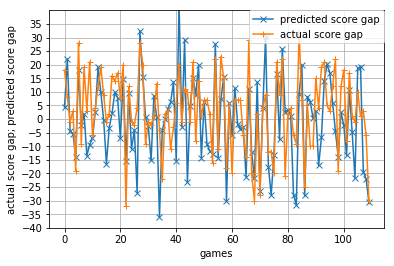

In [9]:
# Visulization of prediction 
import matplotlib.pyplot as plt
pred_list = list(pred)
y_out_list = list(y_out)
fig, ax = plt.subplots()
plt.xlabel('games')
plt.ylabel('actual score gap; predicted score gap')
yticks = range(-40,40,5)
ax.set_yticks(yticks)
ax.set_ylim([-40,40])
x = list(range(len(out_of_sample)))
plt.plot(x,pred_list,"x-",label="predicted score gap")
plt.plot(x,y_out_list,"+-",label="actual score gap")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
plt.show()

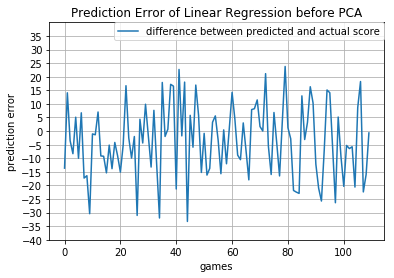

In [10]:
# Visulization of prediction 
import matplotlib.pyplot as plt
pred_list = list(pred)
y_out_list = list(y_out)
pred_actual_diff = [pred[i] - y_out[i] for i in range(len(pred))]
pred_actual_diff = [float(x) for x in pred_actual_diff]
fig, ax = plt.subplots()
plt.xlabel('games')
plt.ylabel('prediction error')
yticks = range(-40,40,5)
ax.set_yticks(yticks)
ax.set_ylim([-40,40])
x = list(range(len(out_of_sample)))
plt.plot(x, pred_actual_diff, label="difference between predicted and actual score")
plt.title("Prediction Error of Linear Regression before PCA")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)